In [98]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import make_pipeline, Pipeline

# En este notebook ,gracias a los datos limpios que logramos generar,tratamos de contestar la pregunta :

#### -¿Los jugadores con mejores resultados en test físicos son más propensos a lesionarse?

In [101]:
datos =pd.read_csv("Datos_limpio.csv")#cargamos los datos limpios
datos.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,False,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,False,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,True,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,False,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,True,31.773932


In [102]:
datos.info() ##vemos las columnas que tenemos en nuestros DataFreame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

In [103]:
###---pregunta 1: ----¿Los jugadores con mejores resultados en test físicos son más propensos a lesionarse--------
tests= datos.iloc[:, 7:13] ### separamos todos las columnas que correpondan a tests
lesiones = datos["Injury_Next_Season"] ## consideramos solo las lesiones futuras

In [104]:
tests.head()

,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score
0,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705
1,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987
2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176
3,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824
4,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256


In [105]:
lesiones.head()

0    False
1    False
2     True
3    False
4     True
Name: Injury_Next_Season, dtype: bool

#### Como los datos de tiempo de reaccion y el test de velocidad se considera mejor puntaje ,el que demora menos tiempo,entonces se hara la tranformacion en ambas columna,dejando los valores en negativo, esto con el proposito que si una persona tiene mayor puntaje en estas pruebas,quiere decir que su rendimiento no es tan bueno,por lo que se "castigaria" con este puntaje.Esto se realizara,con el proposito de que cuando calculemos el promedio de todas las pruebas,realmente sea con puntajes coherentes.

In [107]:
tests[["Reaction_Time_ms", "Sprint_Speed_10m_s"]] = tests[["Reaction_Time_ms", "Sprint_Speed_10m_s"]].apply(func=lambda x : -x)

In [108]:
tests.head()#comprobamos que el cambio se realizo bien

,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score
0,77.460279,79.115738,-284.487853,91.212476,-5.874630,77.599705
1,72.634442,82.541688,-250.579249,87.294078,-5.796269,94.418987
2,77.064490,75.943631,-269.119918,83.440688,-5.731209,70.179176
3,82.810232,73.878324,-226.376412,87.591894,-6.220212,83.473824
4,76.772859,76.653043,-229.021042,83.125161,-5.385958,87.037256


In [128]:
tests["Puntaje_promedio"]= tests.mean(axis=1)##Almaceno el promedio de los test como nueva columna

In [130]:
tests.head()

,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Puntaje_promedio
491,84.303443,97.035088,-272.070701,89.709610,-6.396072,84.162130,12.790583
761,81.124162,91.094866,-280.900018,84.846882,-6.821959,87.806284,9.525036
787,78.152967,87.386102,-286.060894,90.225837,-5.685198,84.200175,8.036498
73,75.401178,82.061597,-290.386030,80.916712,-6.113312,96.212492,6.348773
168,72.753939,83.951406,-283.365373,86.099809,-6.079521,97.269791,8.438342


In [132]:
##--- ORDENAMOS POR EL PUNTAJE OBTENIDO ----- 
tests = tests.sort_values(by =["Puntaje_promedio"], ascending=False)
tests.head()

,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Puntaje_promedio
626,81.301006,84.054015,-180.000000,88.984960,-6.316222,89.997490,26.336875
86,90.056353,82.027696,-188.038208,81.967948,-5.772616,83.237306,23.913080
611,80.938717,80.385176,-207.651239,99.276615,-6.255306,94.199343,23.482218
399,85.512124,75.076208,-201.814442,95.233664,-6.064791,91.725885,23.278108
188,80.295945,76.601671,-195.925656,100.000000,-5.972054,83.781655,23.130260


<Axes: xlabel='Puntaje_promedio', ylabel='Injury_Next_Season'>

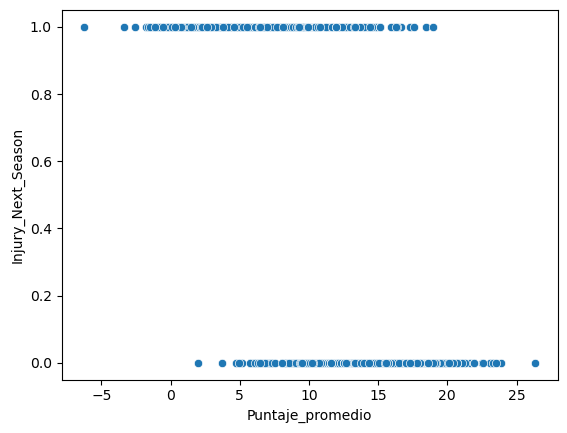

In [134]:
sns.scatterplot(x=tests["Puntaje_promedio"], y=lesiones)

### Como podemos observar los datos son binarios ,por lo que para abordar este problema se puede usar regresion logistica para que categorice mediante probabilidades

In [138]:
from sklearn.model_selection import train_test_split ,GridSearchCV ,KFold 
from sklearn.linear_model import LogisticRegression 
X_train ,X_test ,y_train , y_test = train_test_split(tests, lesiones, test_size = 0.2, shuffle = True, random_state = 42)

In [140]:
X_train

,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Puntaje_promedio
156,88.305286,74.261149,-229.127450,78.812750,-5.863486,72.126987,13.085873
785,74.231096,68.224178,-251.172108,71.010193,-5.789001,76.624216,5.521429
174,86.738163,73.095399,-246.439416,87.305350,-6.252491,76.139357,11.764394
640,84.750831,82.114082,-269.322857,95.093974,-5.886502,81.840573,11.431684
301,77.466648,77.443792,-233.432795,72.951580,-6.199328,74.291385,10.420214
...,...,...,...,...,...,...,...
507,87.405876,86.977967,-239.778266,84.997371,-5.960636,92.253637,17.649325
665,72.304310,83.300307,-222.778190,90.608865,-6.212643,82.013827,16.539413
308,71.039360,82.278911,-218.405187,79.319161,-5.709481,69.199950,12.953786
571,65.555818,80.205875,-237.239261,73.893773,-5.963662,80.743697,9.532707


In [142]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train_esc = scaler.fit_transform(X_train)
X_tes_esc = scaler.transform(X_test)

In [144]:
X_tes_esc

array([[-2.78536224, -0.87886488, -0.65253612, ...,  0.44175156,
        -0.55728753, -1.23449855],
       [-1.10932856, -0.49135825, -0.75305931, ..., -0.17385654,
        -1.47443932, -1.10520916],
       [ 0.21821518, -0.14800696,  1.02166601, ...,  0.51543981,
         1.41588394,  1.4273862 ],
       ...,
       [-0.83684871, -0.23896433, -1.42887654, ...,  0.15051482,
        -0.56817822, -1.55052845],
       [-0.35721988, -0.21715172, -0.28114991, ..., -1.17232831,
         1.12325031, -0.44320772],
       [-0.2969332 ,  0.3656001 , -1.55763033, ...,  0.64124321,
         0.36014739, -1.11871249]])

In [146]:
from sklearn.tree import  DecisionTreeClassifier
tree = DecisionTreeClassifier() 
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
parametros ={"min_samples_leaf":np.arange(1,5),
            "min_samples_split":np.arange(2,5), 
            "max_depth" : np.arange(1,6)}
grilla = GridSearchCV(tree, parametros, cv =kfold )
grilla.fit(X_train_esc, y_train)
print(grilla.best_params_, grilla.best_score_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2} 0.509375


In [150]:
reg = LogisticRegression() 
reg.fit(X_train_esc, y_train)
print(reg.score(X_train_esc, y_train))
      
print(reg.score(X_test, y_test))

0.5359375
0.5


C:\Users\semab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [152]:
from sklearn.ensemble import RandomForestClassifier
random_forest =RandomForestClassifier() 
k_f_r = KFold(n_splits=6, shuffle=True , random_state=42)
params = {"n_estimators":[100,300 ,500], 
          "max_depth" :[10,15,20]}
grilla_random = GridSearchCV(random_forest, params, cv = k_f_r )
grilla_random.fit(X_train_esc , y_train)
print(grilla_random.best_params_, grilla_random.best_score_)


{'max_depth': 15, 'n_estimators': 100} 0.5436871803914654


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
params={"n_neighbors":np.arange(1,30)}
kfold_knn =KFold(n_splits=6, shuffle=True, random_state=42)
grid_knn = GridSearchCV(knn ,params, cv=kfold_knn)
grid_knn.fit(X_train_esc, y_train)
print(grilla_random.best_params_, grilla_random.best_score_)

In [ ]:
tree =DecisionTreeClassifier()
kfold_tree = KFold(n_splits=7, shuffle=True, random_state=42)
params_tree ={"max_depth":np.arange(1,10),
    "min_samples_split": np.arange(2,5),
    "min_samples_leaf" : np.arange(1,5)}

grilla_trre = GridSearchCV(tree, params_tree, cv = kfold)
grilla_trre.fit(X_train_esc, y_train)
print(grilla_trre.best_params_, grilla_trre.best_score_)

In [ ]:
from sklearn.tree import plot_tree 
pipeline_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipeline_tree.fit(X_train, y_train)

In [ ]:
pipeline_tree.score(X_train, y_train)

In [ ]:
pipeline_tree.score(X_test, y_test)

¿Existe una vecindad en la que el nivel de estrés haga que la posibilidad de lesionarse se disparé?

<Axes: xlabel='Puntaje_promedio', ylabel='Count'>

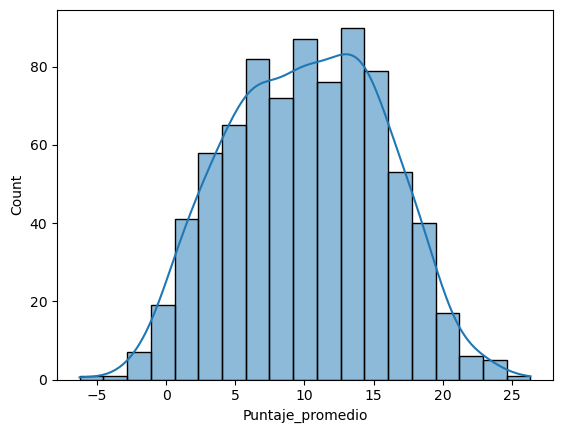

In [162]:
sns.histplot(x=tests["Puntaje_promedio"], kde=True)

In [176]:
datos_unidos = pd.concat([tests, lesiones], axis=1)
datos_unidos

,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Puntaje_promedio,Injury_Next_Season
626,81.301006,84.054015,-180.000000,88.984960,-6.316222,89.997490,26.336875,False
86,90.056353,82.027696,-188.038208,81.967948,-5.772616,83.237306,23.913080,False
611,80.938717,80.385176,-207.651239,99.276615,-6.255306,94.199343,23.482218,False
399,85.512124,75.076208,-201.814442,95.233664,-6.064791,91.725885,23.278108,False
188,80.295945,76.601671,-195.925656,100.000000,-5.972054,83.781655,23.130260,False
...,...,...,...,...,...,...,...,...
298,61.525433,69.465289,-279.518583,77.148754,-5.831914,67.584402,-1.604436,True
200,62.133717,67.346193,-286.343408,69.337186,-6.110034,83.139965,-1.749397,True
82,77.912986,72.043918,-289.930294,80.454724,-5.879918,50.000000,-2.566431,True
379,64.849960,70.974526,-284.007004,72.941406,-5.269036,60.332346,-3.362967,True


In [188]:
datos_unidos.groupby("Injury_Next_Season")["Puntaje_promedio"].mean()#intento aproximar el promedio de los lesionados de la sgte temporada.

Injury_Next_Season
False    14.050133
True      6.246118
Name: Puntaje_promedio, dtype: float64

In [230]:
for i in datos_unidos.columns : 
    if i != "Puntaje_promedio" and (i != "Injury_Next_Season") : 
        print(f"PROMEDIOS DE {i.upper()} ")
        print(datos_unidos.groupby("Injury_Next_Season")[i].mean())
        print("-"*40)

PROMEDIOS DE KNEE_STRENGTH_SCORE 
Injury_Next_Season
False    77.964434
True     71.902064
Name: Knee_Strength_Score, dtype: float64
----------------------------------------
PROMEDIOS DE HAMSTRING_FLEXIBILITY 
Injury_Next_Season
False    82.206416
True     76.101831
Name: Hamstring_Flexibility, dtype: float64
----------------------------------------
PROMEDIOS DE REACTION_TIME_MS 
Injury_Next_Season
False   -238.819878
True    -260.026610
Name: Reaction_Time_ms, dtype: float64
----------------------------------------
PROMEDIOS DE BALANCE_TEST_SCORE 
Injury_Next_Season
False    87.260072
True     80.404603
Name: Balance_Test_Score, dtype: float64
----------------------------------------
PROMEDIOS DE SPRINT_SPEED_10M_S 
Injury_Next_Season
False   -6.104114
True    -5.793936
Name: Sprint_Speed_10m_s, dtype: float64
----------------------------------------
PROMEDIOS DE AGILITY_SCORE 
Injury_Next_Season
False    81.793867
True     74.888756
Name: Agility_Score, dtype: float64
---------------